In [1]:
#!conda install intake fsspec intake-xarray intake-thredds -c conda-forge -y

In [2]:
#!conda install eccodes cfgrib -c conda-forge -y

In [3]:
#!pip install climetlab --quiet

In [4]:
# linting
#%load_ext nb_black
#%load_ext lab_black

## Forecast verification 

Verification is the assessment and quantification of the relationship between a matched set of forecasts and observations. 
The bible of model verification is the "Forecast Verification: A Practitioner's Guide in Atmospheric Science" I T Jolliffe David B Stephenson
 
World Weather Research Programme (WWRP) maintains a specific working group on the issue of Forecast Verification Research, the WWRP Joint Working Group on Forecast Verification Research (JWGFVR,  https://community.wmo.int/en/activity-areas/wwrp/wwrp-working-groups/wwrp-forecast-verification-research).

The group use to hold every couple of year a workshop o the verification method. 
As a result of the 7th  International Verification Methods Workshop there a https://www.cawcr.gov.au/projects/verification/



## What makes a forecast "good"?

Allan Murphy, a pioneer in the field of forecast verification, wrote an essay on what makes a forecast "good" (Murphy, 1993). He distinguished three types of "goodness":
<b>Consistency</b> - the degree to which the forecast corresponds to the forecaster's best judgement about the situation, based upon his/her knowledge base 

<b>Quality</b> - the degree to which the forecast corresponds to what actually happened 

<b>Value</b> - the degree to which the forecast helps a decision maker to realize some incremental economic and/or other benefit

Since we're interested in forecast verification, let's look a bit closer at the forecast quality.
Murphy described nine aspects (called "attributes") that contribute to the quality of a forecast. These are:

<b>Bias</b> - the correspondence between the mean forecast and mean observation. 

<b>Association</b>  - the strength of the linear relationship between the forecasts and observations (for example, the correlation coefficient measures this linear relationship) 

<b>Accuracy</b>  - the level of agreement between the forecast and the truth (as represented by observations). The difference between the forecast and the observation is the error. The lower the errors, the greater the accuracy. 

<b>Skill</b>  - the relative accuracy of the forecast over some reference forecast. The reference forecast is generally an unskilled forecast such as random chance, persistence (defined as the most recent set of observations, "persistence" implies no change in condition), or climatology. Skill refers to the increase in accuracy due purely to the "smarts" of the forecast system. Weather forecasts may be more accurate simply because the weather is easier to forecast -- skill takes this into account. 

<b>Reliability</b>  - the average agreement between the forecast values and the observed values. If all forecasts are considered together, then the overall reliability is the same as the bias. If the forecasts are stratified into different ranges or categories, then the reliability is the same as the conditional bias, i.e., it has a different value for each category. 

<b>Resolution</b>  - the ability of the forecast to sort or resolve the set of events into subsets with different frequency distributions. This means that the distribution of outcomes when "A" was forecast is different from the distribution of outcomes when "B" is forecast. Even if the forecasts are wrong, the forecast system has resolution if it can successfully separate one type of outcome from another. 

<b>Sharpness</b>  - the tendency of the forecast to predict extreme values. To use a counter-example, a forecast of "climatology" has no sharpness. Sharpness is a property of the forecast only, and like resolution, a forecast can have this attribute even if it's wrong (in this case it would have poor reliability). 

<b>Discrimination</b>  - ability of the forecast to discriminate among observations, that is, to have a higher prediction frequency for an outcome whenever that outcome occurs. 

<b>Uncertainty</b>  - the variability of the observations. The greater the uncertainty, the more difficult the forecast will tend to be."


At this link, https://confluence.ecmwf.int/display/FUG/Section+12.B+Statistical+Concepts+-+Probabilistic+Data#Section12.BStatisticalConceptsProbabilisticData-Introduction
it is possible find a nice revies of the main statistical concepts useful to verify a forecastForecasting 

# Metrics: Deterministic and Probabilistic

## Deterministic

Deterministic metrics assess the forecast as a <b>definite prediction</b> of the future, rather than in terms of probabilities. Another way to look at deterministic metrics is that they are a special case of probabilistic metrics where a value of one is assigned to one category and zero to all others [Jolliffe and Stephenson, 2011].
### Correlation metrics 
Pearson Correlation

### Distance metrics
Mean Squared Error (MSE)
Root Mean Square Error (RMSE)
Mean Absolute Error (MAE)


## Probabilistic

Probabilistic metrics include the spread of the ensemble simulations in their calculations and assign a probability value between 0 and 1 to their forecasts [Jolliffe and Stephenson, 2011].

### Continuous Ranked Probability Score (CRPS)
CRPS can also be considered as the probabilistic Mean Absolute Error (mae). 

### Continuous Ranked Probability Skill Score (CRPSS)
Continuous Ranked Probability Skill Score (CRPSS)
As CRPS but calculated as skill respect to the reference (i.e. climatology) forecast

### Brier Score
The Mean Square Error (mse) of probabilistic two-category forecasts where the verification data are either 0 (no occurrence) or 1 (occurrence) and forecast probability may be arbitrarily distributed between occurrence and non-occurrence.
!!!Can be used as a way to verify the occurrence of extreme events.


##### Observations
Forecast can be verified with in situ observation, satellite observation or reanalysis

Reanalysis uses its forecast models and data assimilation systems to 'reanalyse' archived observations, creating global data sets describing the recent history of the atmosphere, land surface, and oceans. The essence of this process, which provides consistent and convenient 'maps without gaps', is explained in this animation (https://www.youtube.com/watch?v=FAGobvUGl24)

Several groups around the words produce reanalysis, one of these is ECMWF that produce the global reanalysis ERA 5





## ERA 5 
ERA5 is the latest climate reanalysis produced by ECMWF, providing hourly data on many atmospheric, land-surface and sea-state parameters together with estimates of uncertainty.

ERA 5 data are available in the Climate Data Store on regular latitude-longitude grids at 0.25° x 0.25° resolution, with atmospheric parameters on 37 pressure levels. 

ERA 5 is periodically updated in CDS Copernicus, searching for this dataset 4 different products will be found:
- hourly on pressure data
- hourly surface data
- monthly on pressure data
- monthly surface data

https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset&keywords=((%20%22Product%20type:%20Reanalysis%22%20)%20AND%20(%20%22Variable%20domain:%20Atmosphere%20(surface)%22%20)%20AND%20(%20%22Spatial%20coverage:%20Global%22%20))

Data are updated every 5 days...therefore March 9 2024 is already available!!!

One of the step to download data from CDS is Register
https://cds.climate.copernicus.eu/user/register?destination=%2Fcdsapp%23!%2Fdataset%2Freanalysis-era5-single-levels
The best to download multiple data is CDS API
This is the explanation of how cds api works and how to install API Key and API Client
https://cds.climate.copernicus.eu/api-how-to



Note 

ERA5 exists as an AWS dataset 😊
https://registry.opendata.aws/ecmwf-era5/#:~:text=The%20dataset%20provides%20all%20essential,surface%20temperature%20and%20wave%20height.

Unfortunately seems to be not updated and I wasn't able to reach the catalog list  😞 😔



In [ ]:
## Let's start downloading the forecast  data 

In [1]:
import intake
import fsspec  # caching downloads

# specify caching location, where to store files to with their original names
fsspec.config.conf["simplecache"] = {
    "cache_storage": "../my_caching_folder",
    "same_names": True,
}
import intake_xarray  # access files hosted via THREDDS
#import climetlab  # download ERA5
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import climpred  # forecast verification

c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Find the data

GEFS output can be found on a `THREDDS` server: https://www.ncei.noaa.gov/thredds/catalog/model-gefs-003/202008/20200831/catalog.html

Here, we use `intake-thredds` to access the THREDDS catalog, `intake-xarray` to access the files and cache them with `fsspec`. However, you can also download the files manually, e.g. with `wget`:

- https://intake.readthedocs.io/en/latest/
- https://intake-xarray.readthedocs.io/en/latest/
- https://intake-thredds.readthedocs.io/en/latest/
- https://filesystem-spec.readthedocs.io/en/latest/

In [2]:
# all the metadata about GEFS
cat = intake.open_thredds_cat(
    "https://www.ncei.noaa.gov/thredds/catalog/model-gefs-003/202008/20200831/catalog.xml"
)
cat

c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No name found:
  args:
    url: https://www.ncei.noaa.gov/thredds/catalog/model-gefs-003/202008/20200831/catalog.xml
  description: ''
  driver: intake_thredds.cat.ThreddsCatalog
  metadata:
    authority:
    - gov.noaa.ncdc
    contributor:
      Scientific Contact:
      - Zoltar Toth
      Technical Contact:
      - Yuejian Zhu
    creator:
    - {}
    dataType: GRID
    date:
    - type: created
      value: '2007-03-27'
    - type: issued
      value: '2007-10-01'
    documentation:
      abstract:
      - The Global Ensemble Forecast System (GEFS) is a weather forecast model made
        up of 21 separate forecasts, or ensemble members. The National Centers for
        Environmental Prediction (NCEP) started the GEFS to address the nature of
        uncertainty in weather observations, which are used to initialize weather
        forecast models. The proverbial butterfly flapping her wings can have a cascading
        effect leading to wind gusts thousands of miles away. This e

Opening without `backend_kwargs` raised `DatasetBuildError`. Need to specify variable by `filter_by_keys` for `grib` files.

DatasetBuildError: multiple values for unique key, try re-open the file with one of:

- filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
- filter_by_keys={'typeOfLevel': 'surface'}
- filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
- filter_by_keys={'typeOfLevel': 'heightAboveGround'}
- filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
- filter_by_keys={'typeOfLevel': 'atmosphere'}
- filter_by_keys={'typeOfLevel': 'nominalTop'}
- filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
- filter_by_keys={'typeOfLevel': 'meanSea'}

In [3]:
# how to open grib files: https://github.com/ecmwf/cfgrib/issues/170
intake_xarray.NetCDFSource(
    "simplecache::https://www.ncei.noaa.gov/thredds/fileServer/model-gefs-003/202008/20200831/gens-a_3_20200831_1800_000_20.grb2",
    xarray_kwargs=dict(
        engine="cfgrib",
        backend_kwargs=dict(
            filter_by_keys={"typeOfLevel": "heightAboveGround", "shortName": "2t"}
        ),
    ),
).to_dask().coords

c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\intake_xarray\base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


Coordinates:
    number             int32 4B ...
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 1kB 90.0 89.0 88.0 ... -89.0 -90.0
  * longitude          (longitude) float64 3kB 0.0 1.0 2.0 ... 357.0 358.0 359.0
    valid_time         datetime64[ns] 8B ...

## Get forecasts

In [2]:
from datetime import datetime, timedelta


#ALREADY DOWLOADED UP TO: 2021 06 30 (redownload this day)
start_date = datetime(2021, 6, 25)
end_date = datetime(2021, 7, 2)

# Generate the array of date strings

inits_time = "00"  # get forecasts started at 00:00
#inits = ["20230714", "20230715", "20230716"]  # four initial dates
inits = [(start_date + timedelta(days=i)).strftime('%Y%m%d') for i in range((end_date - start_date).days + 1)]

members = range(30)
leads = np.arange(0, 6 * 3 * 2 + 1, 6)  # 6h lead forecasts, 6 leads upto 36h
leads

array([ 0,  6, 12, 18, 24, 30, 36])

In [ ]:
import s3fs
import os

bucket = 's3://noaa-gefs-pds'
local_target_base = './gefs-data/'

local_paths = []
#0p50 is 0.50 degree resolution
#gec: control (member 00), gep:perturbation
#Copy files from the s3 bucket to a local folder

for init in inits:
    bucket_paths=[]
    files=[]
    for lead in leads:
        for member in members:
            try:
                mem_str = str(member).zfill(2)
                if(member==0):
                    mem_str = 'gec'+mem_str
                else:
                    mem_str = 'gep'+mem_str
                file = mem_str+'.t'+inits_time+'z.pgrb2a.0p50.f'+str(lead).zfill(3)
                files.append(file)
                bucket_paths.append(bucket+'/gefs.'+init+'/'+inits_time+'/atmos/pgrb2ap5/'+file)
                local_paths.append(local_target_base+init+'/'+file)

            except Exception as e:
                print("failed", type(e).__name__, e)
    local_target = local_target_base+init+'/'
    if not os.path.exists(local_target):
        os.mkdir(local_target)
    print('Downloading: '+ str(bucket_paths))
    s3 = s3fs.S3FileSystem(anon=True)
    s3.get(bucket_paths, local_target)
    print('Done.')

In [3]:
# Gather just the local file names
local_target_base = './gefs-data/'

local_paths = []
#0p50 is 0.50 degree resolution
#gec: control (member 00), gep:perturbation
#Copy files from the s3 bucket to a local folder

local_paths = [
    f"{local_target_base}{init}/{('gec' if member == 0 else 'gep')}{str(member).zfill(2)}.t{inits_time}z.pgrb2a.0p50.f{str(lead).zfill(3)}"
    for init in inits
    for lead in leads
    for member in members
]

In [8]:
file_path_pattern = "gefs-data/{init}/*.t{inits_time}z.pgrb2a.0p50.f{lead}"

gefs_ds = xr.concat(
    [xr.concat(
        [xr.open_mfdataset(file_path_pattern.format(init=init, inits_time=inits_time, lead=str(lead).zfill(3)),
                           concat_dim='member', combine='nested',
                           engine='cfgrib', backend_kwargs=dict(filter_by_keys={'typeOfLevel': 'heightAboveGround', "cfVarName": "t2m"}))
         for lead in leads],
         dim='step')
     for init in inits],
    dim='time'
)

In [9]:
gefs_ds

<xarray.Dataset> Size: 2GB
Dimensions:            (member: 30, time: 8, step: 7, latitude: 361,
                        longitude: 720)
Coordinates:
    number             (member) int32 120B 0 1 2 3 4 5 6 ... 24 25 26 27 28 29
  * time               (time) datetime64[ns] 64B 2021-06-25 ... 2021-07-02
  * step               (step) timedelta64[ns] 56B 00:00:00 ... 1 days 12:00:00
    heightAboveGround  float64 8B 2.0
  * latitude           (latitude) float64 3kB 90.0 89.5 89.0 ... -89.5 -90.0
  * longitude          (longitude) float64 6kB 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time         (time, step) datetime64[ns] 448B 2021-06-25 ... 2021-0...
Dimensions without coordinates: member
Data variables:
    t2m                (time, step, member, latitude, longitude) float32 2GB dask.array<chunksize=(1, 1, 1, 361, 720), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-04-09T08:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
# save time when reproducing
gefs_ds = init.compute()
gefs_ds.to_netcdf('20200829_20200831_GEFS_a.nc')

In [4]:
gefs_ds = xr.open_dataset("./20200829_20200831_GEFS_a.nc")

## Get observations

`climetlab` wraps `cdsapi` to download from the Copernicus Climate Data Store (CDS):

- https://cds.climate.copernicus.eu/cdsapp#!/home
- https://climetlab.readthedocs.io/en/latest/
- https://github.com/ecmwf/cdsapi/

  Information in  climetlab  can be found in https://climetlab.readthedocs.io

  CliMetLab is a Python package aiming at simplifying access to climate and meteorological datasets, allowing users to focus on science instead of technical issues such as data access and data formats. It is mostly intended to be used in Jupyter notebooks, and be interoperable with all popular data analytic packages, such as NumPy, Pandas, Xarray, SciPy, Matplotlib, etc. as well as machine learning frameworks, such as TensorFlow, Keras or PyTorch.

  In this link https://climetlab.readthedocs.io/en/latest/examples/03-source-cds.html
  there is an example on how retrieve data from CDS
  

In [22]:
import cdsapi
from datetime import datetime, timedelta
import numpy as np
import os

# Initialize the CDS API client
c = cdsapi.Client()

local_target = './ERA5-data/'
if not os.path.exists(local_target):
    os.mkdir(local_target)
# Loop through each date
for init in inits:
    # Make the API call
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'grib',
            'variable': '2m_temperature',
            'year': init[:4],
            'month': init[4:6],
            'day': init[6:],
            'time': ["00:00", "06:00", "12:00", "18:00"],
        },
        f'{local_target}{init}_data.grib')


2024-04-09 08:52:10,717 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-04-09 08:52:10,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-04-09 08:52:11,077 INFO Request is completed
INFO:cdsapi:Request is completed
2024-04-09 08:52:11,077 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.internal-1712674102.1200826-17291-17-8608222e-a9ee-4501-b590-6d114dbad2e0.grib to ./ERA5-data/20210625_data.grib (7.9M)
INFO:cdsapi:Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.internal-1712674102.1200826-17291-17-8608222e-a9ee-4501-b590-6d114dbad2e0.grib to ./ERA5-data/20210625_data.grib (7.9M)
2024-04-09 08:52:18,129 INFO Download rate 1.1M/s                                                       

In [7]:
import xarray as xr
local_target = './ERA5-data/'

grib_files = [f'{local_target}{init}_data.grib' for init in inits]
datasets = []

for grib_file in grib_files:
    ds = xr.open_dataset(grib_file, engine='cfgrib')    
    datasets.append(ds)
ds
obs = xr.concat(datasets, dim='time')
obs = obs.sortby('time')
obs = obs.squeeze(drop=True).drop_vars("valid_time")

obs

<xarray.Dataset> Size: 133MB
Dimensions:    (time: 32, latitude: 721, longitude: 1440)
Coordinates:
    number     int32 4B 0
  * time       (time) datetime64[ns] 256B 2021-06-25 ... 2021-07-02T18:00:00
    step       timedelta64[ns] 8B 00:00:00
    surface    float64 8B 0.0
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    t2m        (time, latitude, longitude) float32 133MB 273.8 273.8 ... 219.7
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-04-09T09:33 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
obs = obs.compute()
obs.to_netcdf('20200829_20200831_ERA5_a.nc')

In [3]:
gefs_ds = xr.open_dataset("./20200829_20200831_GEFS_a.nc")
obs = xr.open_dataset("./20200829_20200831_ERA5_a.nc")

In [4]:
# climetlab or cds enable logging.INFO
import logging

logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [8]:
# select a cell but you can average over multiple cell or consider the unselected variable for a gridded verificatio
gefs_id=gefs_ds.sel(latitude=44,longitude=64)

obs_id=obs.sel(latitude=44,longitude=64)

obs_id

<xarray.Dataset> Size: 420B
Dimensions:    (time: 32)
Coordinates:
    number     int32 4B ...
  * time       (time) datetime64[ns] 256B 2021-06-25 ... 2021-07-02T18:00:00
    step       timedelta64[ns] 8B ...
    surface    float64 8B ...
    latitude   float64 8B 44.0
    longitude  float64 8B 64.0
Data variables:
    t2m        (time) float32 128B ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-04-09T09:33 GRIB to CDM+CF via cfgrib-0.9.1...

Text(0, 0.5, '[°K]')

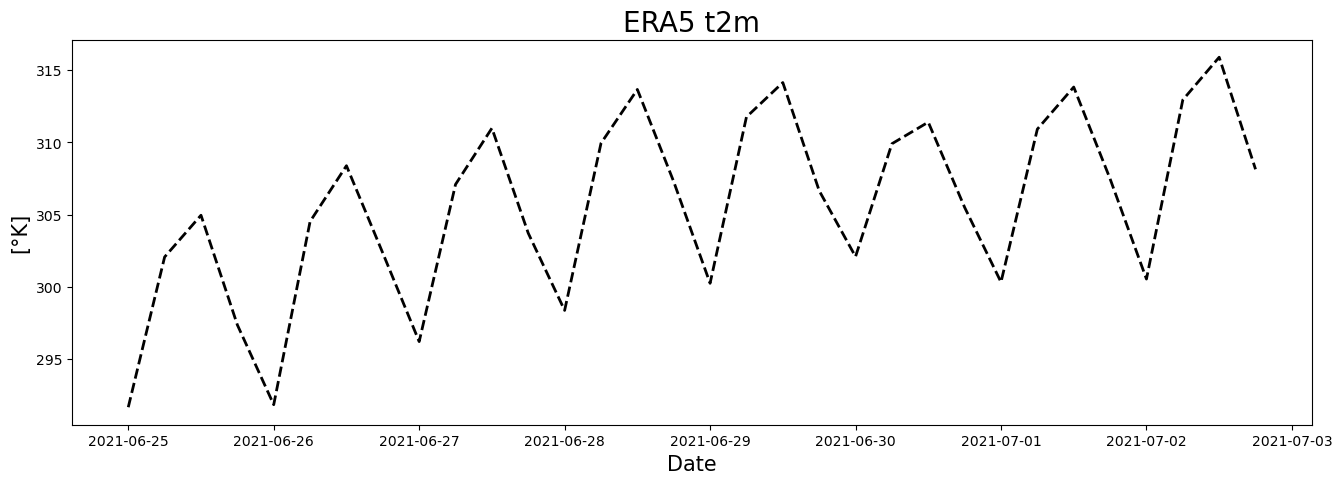

In [9]:
#obs_id.t2m
fig = plt.subplots(figsize=(16, 5))
plt.plot(obs_id.time, obs_id.t2m, color='black', linestyle='dashed', linewidth=2)
plt.title('ERA5 t2m', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('[°K]', fontsize=15)




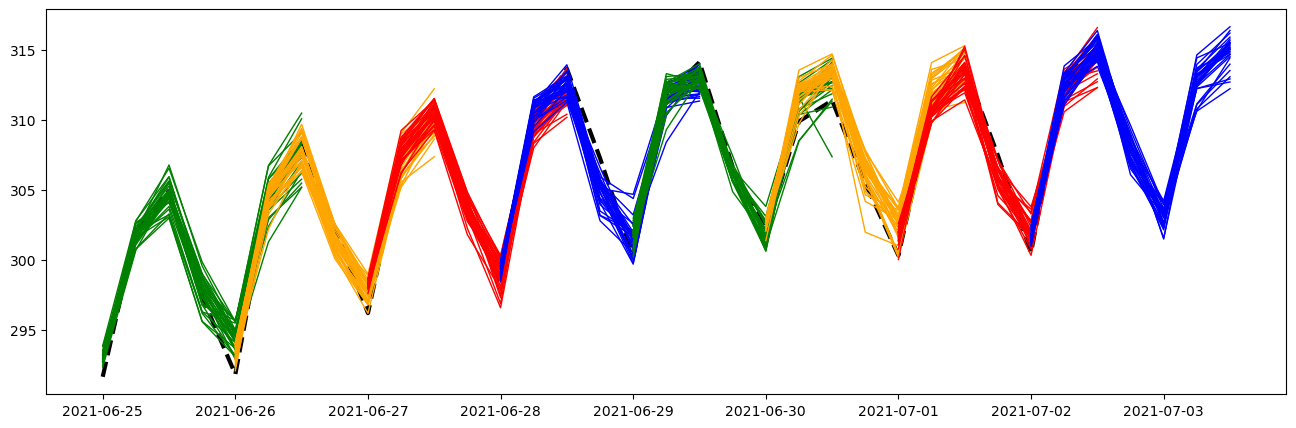

In [10]:
colors=['green','orange','red','blue']

i=0
fig = plt.subplots(figsize=(16, 5))
plt.plot(obs_id.time, obs_id.t2m, color='black', linestyle='dashed', linewidth=3)
for time in gefs_ds.time:  # Example: 5 lead times
     new_date = time + gefs_id.step 
     plt.plot(time + gefs_id.step, gefs_id.t2m.sel(time=time), color=colors[i%4],linewidth=1)
     i=i+1

#fig = plt.subplots(figsize=(16, 5))
#plt.plot(gefs_id.time[0]+step, gefs_id.t2m, color='red', linestyle='dashed', linewidth=2)
#plt.title('GEFS t2m', fontsize=20)
#plt.xlabel('Date', fontsize=15)
#plt.ylabel('[°K]', fontsize=15)

Deterministic : correlation or distance-> I need 1 single representation....1 member of the ensemble or...the avg


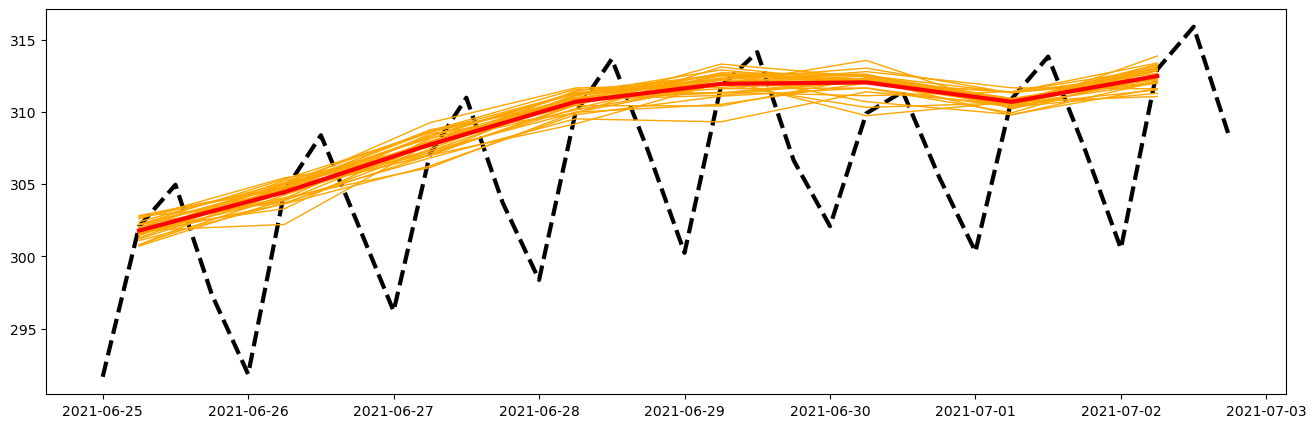

In [11]:
gefs_id.t2m.isel(step=0,member=2)
#ensemble_mean_lead_0=gefs_id.t2m.isel(step=0).mean("member")
lead=1
fig = plt.subplots(figsize=(16, 5))
plt.plot(obs_id.time, obs_id.t2m, color='black', linestyle='dashed', linewidth=3)
plt.plot(gefs_ds.time+gefs_id.step[lead], gefs_id.t2m.isel(step=lead), color=colors[lead],linewidth=1)
plt.plot(gefs_ds.time+gefs_id.step[lead], gefs_id.t2m.isel(step=lead).mean("member"), color=colors[lead+1],linewidth=3)  

<b>The forecast error is calculated as the expected value minus the predicted value. </b>

This is called the residual error of the prediction.

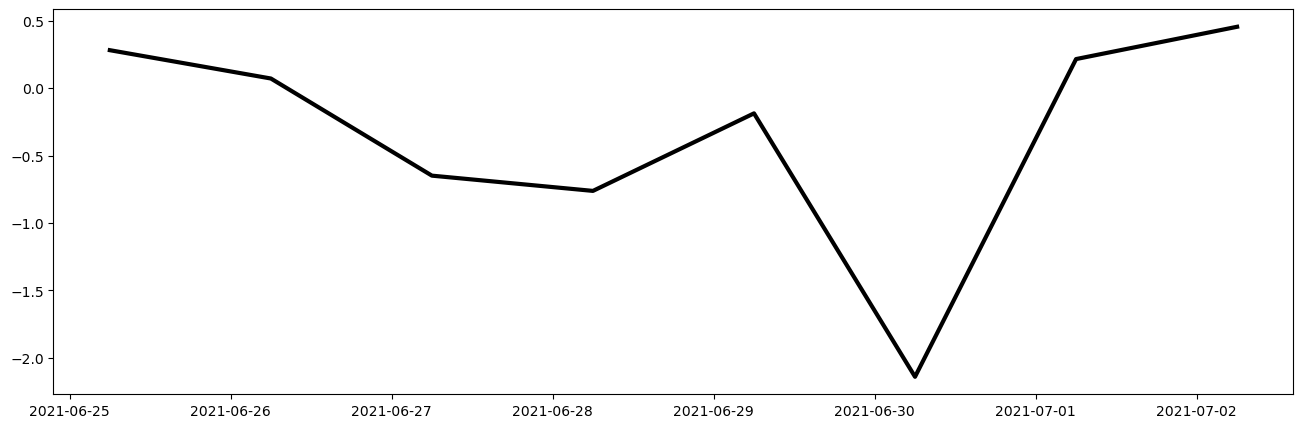

In [12]:
lead=1
forecast_errors = [obs_id.t2m.sel(time=gefs_id.time[i]+gefs_id.step[lead])-gefs_id.t2m.isel(time=i,step=lead).mean("member") for i in range(len(gefs_id.time))]
forecast_errors
fig = plt.subplots(figsize=(16, 5))
plt.plot(gefs_ds.time+gefs_id.step[lead], forecast_errors, color='black', linewidth=3)

<b>Mean Forecast Error (or Forecast Bias)</b>

Mean forecast error is calculated as the average of the forecast error values.

In [13]:
lead=0
forecast_errors = [obs_id.t2m.sel(time=gefs_id.time[i]+gefs_id.step[lead])-gefs_id.t2m.isel(time=i,step=lead).mean("member") for i in range(len(gefs_id.time))]
forecast_errors
bias=sum(forecast_errors) * 1.0/len(gefs_id.time)
bias

<xarray.DataArray 't2m' ()> Size: 8B
array(-1.28367996)
Coordinates:
    number             int32 4B 0
    step               timedelta64[ns] 8B 00:00:00
    surface            float64 8B 0.0
    latitude           float64 8B 44.0
    longitude          float64 8B 64.0
    heightAboveGround  float64 8B 2.0

<b>Mean Absolute Error</b>

The mean absolute error, or MAE, is calculated as the average of the forecast error values, where all of the forecast error values are forced to be positive.

In [14]:
mean_absolute_error = np.mean( np.abs(forecast_errors) )
mean_absolute_error

1.28368

Same but the sklearn.metrics <b> mean_absolute_error </b>

In [15]:

from sklearn.metrics import mean_absolute_error
lead=0
mae = mean_absolute_error(obs_id.t2m.sel(time=gefs_id.time+gefs_id.step[lead]), gefs_id.t2m.isel(step=lead).mean("member"))
print('MAE: %f' % mae)

MAE: 1.283680


<b> Root Mean Squared Error </b>

The mean squared error described above is in the squared units of the predictions.

https://climpred.readthedocs.io/en/stable/metrics.html?highlight=metrics

## Forecast skill verification

with {py:class}`.HindcastEnsemble`

In [14]:
alignment = "same_inits"
hindcast = climpred.HindcastEnsemble(gefs_ds.drop_vars("valid_time")).add_observations(obs)
hindcast

c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\climpred\checks.py:201: UserWarning: Did not find dimension "init", but renamed dimension time with CF-complying standard_name "forecast_reference_time" to init.
  warnings.warn(
c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\climpred\checks.py:201: UserWarning: Did not find dimension "lead", but renamed dimension step with CF-complying standard_name "forecast_period" to lead.
  warnings.warn(


<climpred.HindcastEnsemble>
Initialized:
    t2m      (init, lead, member, latitude, longitude) float32 2GB ...
Uninitialized:
    None
Observations:
    t2m      (time, latitude, longitude) float32 133MB ...

In [15]:
# still experimental, help appreciated https://github.com/pangeo-data/climpred/issues/605
# with climpred.set_options(seasonality='month'):
#     hindcast = hindcast.remove_bias(alignment=alignment, cross_validate=False, how='mean')

In [19]:
skill = hindcast.isel(lead=range(1, 6)).verify(
    metric="crps", comparison="m2o", alignment=alignment, dim=["init", "member"]
)

c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\climpred\classes.py:684: UserWarning: Error due to initialized:  xr.isel((), {'step': range(1, 6)}) failed
ValueError: Dimensions {'step'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'member': 30, 'init': 8, 'lead': 7, 'latitude': 361, 'longitude': 720})
  warnings.warn(f"Error due to initialized:  {msg}")
c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\climpred\classes.py:690: UserWarning: Error due to verification/control/uninitialized: xr.isel((), {'step': range(1, 6)}) failed
ValueError: Dimensions {'step'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'time': 32, 'latitude': 721, 'longitude': 1440})
  warnings.warn(
c:\Users\skysk\anaconda3\envs\GEFS\Lib\site-packages\climpred\utils.py:584: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  return time_index.shift(n, freq)


In [16]:
# zooming into north america
skill.sel(longitude=slice(200, 320), latitude=slice(70, 15)).t2m.plot(
    col="lead", col_wrap=4, robust=True, aspect=2.5
)

NameError: name 'skill' is not defined

In [34]:
import regionmask
import xarray as xr

mask = regionmask.defined_regions.states('US', mask_3D=True)
idaho_mask = mask.sel(region='Idaho')


idaho_ds = gefs_ds.where(idaho_mask)

AttributeError: module 'regionmask.defined_regions' has no attribute 'states'

In [18]:
gefs_ds

<xarray.Dataset> Size: 2GB
Dimensions:            (member: 30, time: 8, step: 7, latitude: 361,
                        longitude: 720)
Coordinates:
    number             (member) int32 120B ...
  * time               (time) datetime64[ns] 64B 2021-06-25 ... 2021-07-02
  * step               (step) timedelta64[ns] 56B 00:00:00 ... 1 days 12:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 3kB 90.0 89.5 89.0 ... -89.5 -90.0
  * longitude          (longitude) float64 6kB 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time         (time, step) datetime64[ns] 448B ...
Dimensions without coordinates: member
Data variables:
    t2m                (time, step, member, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-04-09T08:20 GRIB to CDM+CF via cfgrib-0.9.1...